In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv('eda_data.csv')

In [4]:
data.drop(columns='Unnamed: 0',inplace=True)

In [5]:
data.corr()

,bedroom,bathroom,Total floor,Rent,Carpet Area (ft²)nan,Maintenance (Monthly)nan,Carpet Area (ft²),Maintenance (Monthly)
bedroom,1.000000,0.782119,0.108079,0.244566,-0.002115,-0.017278,0.453222,0.102251
bathroom,0.782119,1.000000,0.165635,0.225180,-0.010338,-0.019968,0.385555,0.107122
Total floor,0.108079,0.165635,1.000000,0.095984,-0.099316,-0.171265,0.087336,0.007397
Rent,0.244566,0.225180,0.095984,1.000000,-0.021914,0.008740,0.207871,0.106785
Carpet Area (ft²)nan,-0.002115,-0.010338,-0.099316,-0.021914,1.000000,0.101049,0.049321,-0.057225
Maintenance (Monthly)nan,-0.017278,-0.019968,-0.171265,0.008740,0.101049,1.000000,0.004779,0.116832
Carpet Area (ft²),0.453222,0.385555,0.087336,0.207871,0.049321,0.004779,1.000000,-0.005303
Maintenance (Monthly),0.102251,0.107122,0.007397,0.106785,-0.057225,0.116832,-0.005303,1.000000


In [6]:
#categorical data
categorical_cols = ['Type', 'furnishing', 'facing', 'state'] 

#import pandas as pd
df_enc = pd.get_dummies(data, columns = categorical_cols)

In [7]:

X = df_enc.drop('Rent', axis =1)
y = df_enc.Rent.values

In [8]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [9]:

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [13]:
# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 28
selected features: 17


In [14]:
X_new=X[selected_feat]

In [15]:
X_new.head()

,bedroom,Total floor,Maintenance (Monthly)nan,Carpet Area (ft²),Maintenance (Monthly),Type_Apartments,furnishing_Furnished,furnishing_Semi-Furnished,facing_North-East,facing_North-West,facing_South,facing_West,facing_others,state_ Karnataka,state_ Kerala,state_ Tamil Nadu,state_ Uttar Pradesh
0,2,6,0,0.636732,0.360623,1,0,1,1,0,0,0,0,0,0,0,0
1,1,4,0,0.550747,0.300338,1,1,0,0,0,0,0,0,0,0,0,0
2,1,3,0,0.599832,0.374466,1,1,0,1,0,0,0,0,0,0,0,0
3,2,4,0,0.657170,0.300382,1,0,1,0,0,0,0,0,0,0,0,0
4,3,5,0,0.781346,0.330497,1,1,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

,alpha,error
1,0.02,-0.66515


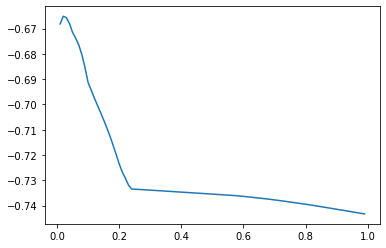

In [17]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [18]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
mean_absolute_error(y_test,tpred_lm)

0.6528391276524385

In [21]:
mean_absolute_error(y_test,tpred_lml)

0.629712415995146

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [23]:
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-0.7230427124047498